*Author*: **Aldo Schioppa**

# Adjoint Method in SU2

Before delving into details, it is meaningful to know that any geometry might be treated in SU2 as a control geometry. Therefore, the general outline is hereby shown:

1. Define the problem, having a clue on what the mesh shall look like;
2. Generate the grid. Further detail shall be provided afterwards;
3. Write the configuration file (.cfg) to run the adjoint;
4. Execute the Python script (**shape_optimisation.py**) catered by SU2 download package;
5. Use **ParaView** to visualise the results.

Subsequently, the workbench shall be thighten to the aerodynamic shapes approach in order to better narrow down the above steps.

# 1. Problem definiton and grid generation

For 2D profiles, the most classical approach is C-shaped grids. As it being unrelated to the framework of this project, any detail concerning the motivations behind this choice shall not be discussed. Nonetheless, the mesh is crucial for direct and adjoint solution accuracy, thus an authomatic algorithm has been implemented to generate structured and unstructured grids on the open-source mesher Gmsh quite easily. One should observe that **the choice of the cells type, cells refinement and the shape of the domain might depend on the physical problem being solved. Therefore, it is up to the user to make changes to adapt the grid to the problem itself.** Nonetheless, as transonic and inviscid regimes comprise the aerodynamic background for this project, the grids have been thought for transonic airfoils at cruise condition (high Reynolds number), albeit the grids are certainly .

Gmsh's powerfulness is all contained into the possibility to handle the grid algorithm by editing a .dat file associated to the .geo/.msh file. Nevertheless, there is no direct way to import airfoils' coordinates, so the algorithm makes use of a MIIT's Matlab NACAXXXX generator code which outputs the airfoil coordinates in Gmsh format to be dragged onto the Gmsh .dat file.

The algorithm is hereafter illustrated:

1. **C-SHAPED STRUCTURED GRID**. Run the Matlab code, choose "Non-uniform" distribution (high point density at the LE and TE; the number of points is arbitrary, albeit changing would imply modifying the entire .dat file, so that it is better to lean towards the default value of 100) and save the airfoil coordinates by choosing ".geo" format. The algorithm shall output a .geo file consisting of both points and lines for geometry generation. Open up the Gmsh file ("Mesh_Structured_Grid.geo"), press "Edit script" and only paste the points at the beginning of the file. Indeed, for a better code maneuverability, using splines in place of piece-wise geometry has been prefered. Subsequently, save the script and reload it. Finally, mesh the geometry and press "2D Recombine". Overall, the above procedure works for C-shaped grid sorrounding NACAXXXX airfoils obtained with cosine distribution. This approach is essential when the user is interested in boundary layer capturing (non-negligible viscosity). Unsteady solver is also feasible. **ROUNDED UNSTRUCTURED TRIANGULAR GRID**. The following approach is simpler and works for any geometry as long as the coordinates are catered in the required format. Similarily to what has been shown beforehand, the same must be imported into Gmsh and meshed again. It is advisible to change the 2D algorithm into Delaunay to build a smoother grid, despite the increasing number of cells.  Further details, such as the global mesh size, are to be found in the .dat script itself as comments. It is also noticeble to observe that the Matlab code is not serviceable unless the user desires to use a NACA airfoil. The grid exhibits high refinement at the wall but it is devoid of infletion layers, so that the same is better for inviscid cases. Nonetheless, it is always possible to refine downstream the trailing edge and use unsteady solvers. The limited number of cells has been obtained through the combination of two built-in mehsing fields ("Distance" and "Threshold") whose purpose is to fix the cell size onto the wall and the boundaries in such a way Gmsh finds the appropriate growth rate between the two surfaces. **ROUNDED UNSTRUCTURED TRIANGULAR GRID WITH PRISM LAYERS**. The grid in question presents inflation layers at the wall for BL capturing. In particular, the *BoundaryLayer* built-in function allows the user for a better prism layers control near the wall. The grid is based on the same principle as the previous mesh; unsteady solvers is also feasible. 

Overall, the set of grids illustrated covers a vast list of cases, depending on the Reynolds and Mach number. It is also important to assert that the boundary conditions are a function of the solver. For instance, and this shall be the case, a coupled (compressible) solver being employed for transonic regimes requires one unique external boundary in order to work best. Conversely, for incompressible flows, splitting the domain into inlet and outlet is preferred. Therefore, the user should always check out the pysical surfaces in the mesh file. To finish, it is hereby specified that the user shall have to make sure the CFD solver's results are mesh indipendent, thus a mesh convergence study is required. On Gmsh, starting from the initial global size, it is feasible to refine manually or by splitting.

**WARNING**: Without defining any physical surfaces, SU2 shall not be able to assign the boundary conditions to the fluid domain. Thus, remember to check out whether the pysical surfaces are present or not, when it comes to generating a new mesh file.

## 1.1 Mesh export

SU2 is able to read .su2 or CGNS mesh format. The following platforms guarantee it:

1. ICEM CFD
2. Gmsh 
3. CENTAUR

To export the mesh file from Gmsh:

1. File -> Export -> Select the desired extension (.su2) and click OK.
2. A second small window shall pop up onto the screen. Unclick the option "Save all elements".


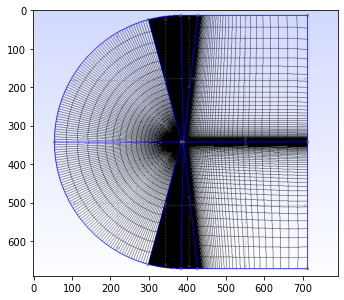

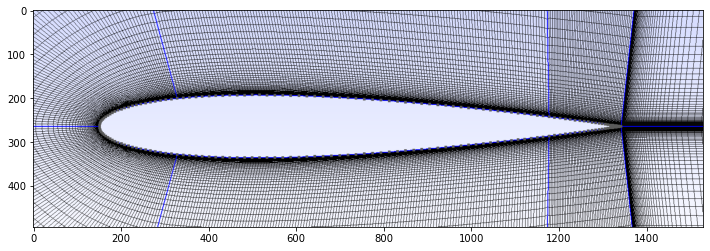

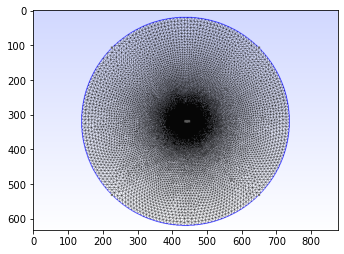

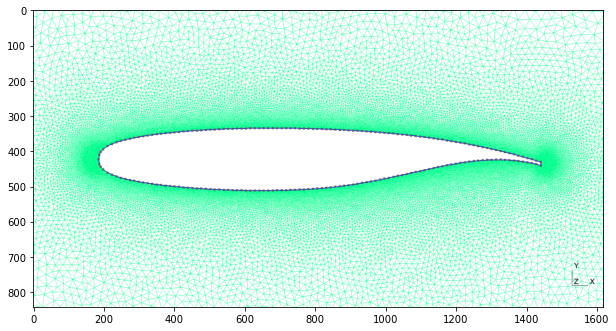

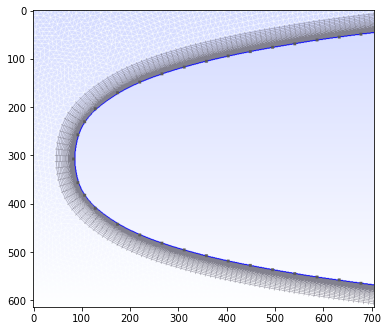

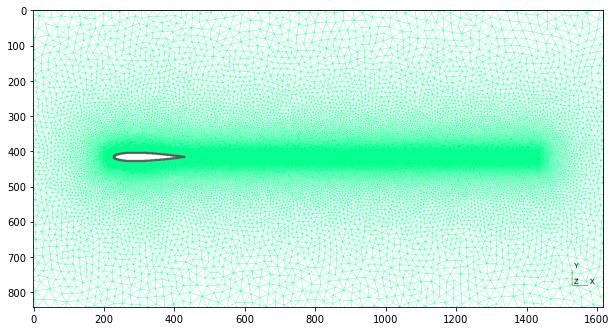

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax1.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Structured_Grid.png'))

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax2=fig.add_subplot(2,1,2)
ax2.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Structured_Grid_Zoom.png'))

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax3=fig.add_subplot(2,2,3)
ax3.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Unstructured_Grid.png'))

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax4=fig.add_subplot(2,1,2)
ax4.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Unstructured_Grid_Zoom.png'))

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax5=fig.add_subplot(2,1,1)
ax5.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Unstructured_Grid_BL.png'))

plt.rcParams["figure.figsize"] = (12,12)
fig=plt.figure()
ax6=fig.add_subplot(2,1,1)
ax6.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Wake_Refinement_NACA0012.png'))

# 2. Configuration file

The SU2 suite is an open-source collection of C++ based software tools for performing Partial Differential Equation (PDE) analysis and solving PDE-constrained optimization problems. The toolset is designed with Computational Fluid Dynamics (CFD) and aerodynamic shape optimization in mind, but is extensible to treat arbitrary sets of governing equations such as potential flow, elasticity, electrodynamics, chemically-reacting flows, and many others. SU2 is comprised by several executable packages. As such, it is usually lanched in a command prompt summoned in a particular folder of interest. As for this, it necessitates a .cfg file to be executed, whose name is **configuration file**, in which the user set the solver alongside the input mesh format and the output files. 

Some remarkable case might be found in the directory **Adjoint** being provided. Please do not edit the marker's name as the solver would fail otherwise (or, make sure the mesh is imported with the correct markers' names). The choice of the parameters shall not be discussed but it aims at accelerating and improving convergence, as well as making the physical set up coherent with respect to the targeted regime. However, a general configuration file containing all the possible options is also provided; it is to combine with the configuration case being presented.

## 2.1 Steady inviscid unconstrained optimisation at constant AoA [1].

The initial geometry chosen for the tutorial is a NACA0012 in transonic, inviscid flow. Under this condition, a shock wave is expected to form over the suction side, which is motive of drag production. **The scope of the following optimisation is to make the wave drag contribute null** by avoiding shock formation. This tutorial is also meant to be an introduction for using the components of SU2 for shape design in the context of a simple, unconstrained optimization problem. In agreement to what has been presented in the theoretical sheet, the following tools are to be utilised:

1. **SU2_CFD** - performs the direct and the adjoint flow simulations.
2. **SU2_DOT** - projects the adjoint surface sensitivities into the design space to obtain the gradient.
3. **SU2_DEF** - deforms the geometry and mesh with changes in the design variables during the shape optimization process.
4. **shape_optimization.py** - automates the entire shape design process by executing the SU2 tools and optimizer.

Make sure the installation is completed and drag the pyhton file onto the folder. The same is available on the SU2 site. Dealing with inviscid equations, the unstructured grid without prism layer has been choosen. To finish, being the problem driven by the Euler equation, and being the optimisation unconstrained, the theoretical expected drag is 0. 

Once the physics has been set up, one should focus on the *ADJOINT-FLOW NUMERICAL METHOD DEFINITION* section of the .cfg file. This section is dedicated to the Adjoint setting. 


In [2]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/inv_NACA0012_ADJOINT-FLOW_NUMERICAL_METHOD_DEFINITION.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Transonic inviscid optimization of a NACA0012 airfoil      %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 2013.09.29                                                             %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ---------------- ADJOINT-FLOW NUMERICAL METHOD DEFINITION -------------------%
% Adjoint problem boundary condition (DRAG, LIFT, SIDEFORCE, MOMENT_X,
%                                    

Let us go through the entire Adjoint setting. Please use the above reference.

1. **OBJECTIVE_FUNCTION**: Depending on the object to be optimised, the boundary condition for the adjoint equation change [3]. Clearly, as the BCs changes, the surface sensibility is modified and thus the mesh deformation. To have a clear framework, an example concerning the current case (drag optimisation with Euler equations) is provided in [2]. SU2 already contain several built-in adjoint BCs according to the objective function of which the list is written above.
2. **CONV_NUM_METHOD_ADJFLOW**: Coherently to what has been said in [3], the adjoint equation consists of an extra equation to be solved. As such, it requires a numerical scheme; observe the Jameson-Schmidt-Turkel scheme is employed both for the direct and the adjoint solution. Other possibilities for compressible flows might be found in [4].
3. **ADJ_JST_SENSOR_COEFF**: Related to the JST scheme. Note that any scheme available on the SU2 library requires a certain number of parameters [4]. The coefficients in question regulate the level of numerical dissipation artificially inserted. In computational physics, numerical dissipation (also known as "numerical diffusion") refers to certain "side-effects" that may occur as a result of a numerical solution to a differential equation. Most fluid dynamics simulations seek to reduce numerical diffusion to the minimum possible, to achieve high fidelity. Nonetheless, under certain circumstances, "artificial diffusion" is added deliberately into the system to avoid singularities and to improve the numerical stability characteristics of the solution. For example, and this is the case, shock waves in fluids are in some approximations infinitely thin, thus becoming discontinuities for the numerical scheme. A simple way to avoid the difficulty is to add diffusion that smooths out the shock. Higher order numerical methods tend to have less numerical diffusion than low order methods. For the case presented, to help the adjoint solution to converge better, the dissipation has been slightly increased through the second coefficients, which represents the 4th order dissipation in the scheme.
4. **TIME_DISCRE_ADJFLOW**: Time scheme.
5. **CFL_REDUCTION_ADJFLOW**: As it decreases, the solution stability improves. When set excessively high, it could lead to insstability in the flow solution.
6. **LIMIT_ADJFLOW**: As largly explained in [3], the adjoint method is able to compute the gradient of a certain function *f* very efficiently by introducing one extra equation (adjoint equation) and thus one extra unkown. The latter is called **adjoint state variable**; the latter might be numerically constrained in order for the adjoint solution to not diverge. Therefore it is quite clear that the adjoint state variale must be as small as possible to improve the accuracy. Nevertheless, overimposing a strict limit might affect the validity of the solution by retrieving incorrect results.

Therefore, overly modifying the *CFL_REDUCTION_ADJFLOW* and *LIMIT_ADJFLOW* spoils the accuracy. One should always study the effects of the aforementioned coefficients. For the current case, the continuous adjoint approach shall be adopted; the user must know that, in case of discrete adjoint mode, SU2 shall not use these parameters unless you activate the option *INCONSISTENT_AD*.



###############################################################################################################################




In [3]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/inv_NACA0012_GEOMETRY_EVALUATION_PARAMETERS.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Transonic inviscid optimization of a NACA0012 airfoil      %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 2013.09.29                                                             %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ----------------------- GEOMETRY EVALUATION PARAMETERS ----------------------%
%
% Marker(s) of the surface where geometrical based function will be evaluated
GEO_MARKER= ( Airfoil )
%
% 

In this section of the configuration file, the pysical wall defined in Gmsh is assigned to the geometry being optimised. Specify the marker name in **GEO_MARKER**.

###############################################################################################################################

In [4]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/inv_NACA0012_DESIGN_VARIABLE_PARAMETERS.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Transonic inviscid optimization of a NACA0012 airfoil      %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 2013.09.29                                                             %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ----------------------- DESIGN VARIABLE PARAMETERS --------------------------%
%
% Kind of deformation (FFD_SETTING, HICKS_HENNE, HICKS_HENNE_NORMAL, PARABOLIC,
%                      HIC

In this section, the design variables parameters are defined through the Hicks-Henne sine-bump functions [3]. The set of design variable is at the bottom of the configuration files. Further details shall be provided afterwords.

###############################################################################################################################

In [5]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/inv_NACA0012_OTHER.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Transonic inviscid optimization of a NACA0012 airfoil      %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 2013.09.29                                                             %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% ------------------------ GRID DEFORMATION PARAMETERS ------------------------%
%
% Number of smoothing iterations for FEA mesh deformation
DEFORM_LINEAR_SOLVER_ITER= 500
%
% Number of non

In this section the convergence settings are defined as well as the mesh deformation section. It is advisible to NOT edit the latter. SU2 caters the users with the possibility to modify the convergence criteria being imposed. For instance, when running a RANS, the *DRAG* might be regarded as a robust conervence (Cauchy) criteria, as no oscillation is expected to exist. The Cauchy criterium utilizes the mean over *CONV_CAUCHY_ELEMS* elements and compares it with a certain treshold *CONV_CAUCHY_EPS*; when the first is smaller than the second, the simulation is said to have converged.  

Observe that, in *INPUT/OUTPUT INFORMATION*, the user must necessarily pass the mesh file and format on the configuration sheet as input. The rest is a list of useful files for the solution representation. Indeed, one should observe that the **output files are all in .vtu**, which is the *ParaView* extension, so that this makes the latter of essential importance when it comes to employing SU2.

*SCREEN_OUTPUT* is strictly linked to the *HISTORY* file. First and foremost, it modifies the screen interface while the simulation is running. Secondly, it is possible to manage the solution files by providing the desired outputs. One should know that the latter are truly related to the solver being employed; in particular, SU2 catalogues the flow fields into several classes. The user can specify the wanted outputs through the following command line:

In [1]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/History.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

VOLUME_OUTPUT= SOLUTION, PRESSURE, MACH, PRESSURE_COEFF, MESH_QUALITY


The class *SOLUTION* already contains any default output for the current solver. Then, the user can either specify single desired outputs or requires the software to retrieve entire classes of outputs. To visualize those classes, type the following command line in the command window:

In [3]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/OUTPUTS_COMMAND_LINE.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

$ SU2_CFD -d inv_NACA0012_basic.cfg


Indeed, the screen shall resemble the following one:

In [5]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/OUTPUTS.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

Available volume output fields for the current configuration in Zone 0 (Comp. Fluid):
Note: COORDINATES and SOLUTION groups are always in the volume output.
+----------------------------------------------------------------+
|Name          |Group Name  |Description                         |
+----------------------------------------------------------------+
|COORD-X       |COORDINATES |x-component of the coordinate vector|
|COORD-Y       |COORDINATES |y-component of the coordinate vector|
|DENSITY       |SOLUTION    |Density                             |
|MOMENTUM-X    |SOLUTION    |x-component of the momentum vector  |
|MOMENTUM-Y    |SOLUTION    |y-component of the momentum vector  |
|ENERGY        |SOLUTION    |Energy                              |
|PRESSURE      |PRIMITIVE   |Pressure                            |
|TEMPERATURE   |PRIMITIVE   |Temperature                         |
|MACH          |PRIMITIVE   |Mach number                         |
|PRESSURE_COEFF|PRIMITIVE   |Pressure c

Observe the absence of any velocity field. Indeed, SU2, by default, outputs the Momentum field. By means of dividing the same by the density field, the user might retrieve the Velocity, if desired. The latter is of unique usefulness in defining Vorticity and Q-criterion, which is not the case here.

###############################################################################################################################

In [6]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/inv_NACA0012_OPTIMAL_SHAPE_DESIGN_DEFINITION.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Transonic inviscid optimization of a NACA0012 airfoil      %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 2013.09.29                                                             %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% --------------------- OPTIMAL SHAPE DESIGN DEFINITION -----------------------%
%
% Available flow based objective functions or constraint functions
%    DRAG, LIFT, SIDEFORCE, EFFICIENCY,

1. **OPT_OBJECTIVE**: The cost function to optimise. It can be an algebraic combination of the objects presented at the top of the sheet. 
2. **OPT_CONSTRAINT**: When the optimisation is constrained, this line defines the constraint functions.
3. **OPT_GRADIENT_FACTOR**/**OPT_RELAX_FACTOR**: The first regulate the norm of the gradient (displayed onto the command prompt output whilst running the optimisation code, **GNORM** column) and the second regulates the algorithm in its first step in the design space. This allows to make sure the algorithm detects a change in the cost function avoiding divergence.
4. **OPT_ITERATIONS**: Maximum number of optimiser iterations.
5. **OPT_ACCURACY**: Accuracy required.
6. **DEFINITION_DV**: Design variable definition according to the sine-bump functions; 30 is the way to summon the Hicks-Hinne variables. Depending on the parametrisation, the syntax changes. The list is provided on top.

During the optimization process, the optimizer shall call the flow and adjoint solutions as necessary to take the next step in the design space. However, note that the optimizer will often make multiple function calls per major optimizer iteration in order to compute the next step size.

###############################################################################################################################

In [7]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/inv_NACA0012_CL_DRIVER_DEFINITION.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
%                                                                              %
% SU2 configuration file                                                       %
% Case description: Transonic inviscid optimization of a NACA0012 airfoil      %
% Author: Francisco Palacios                                                   %
% Institution: Stanford University                                             %
% Date: 2013.09.29                                                             %
% File Version 5.0.0 "Raven"                                                   %
%                                                                              %
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

% -------------------------- CL DRIVER DEFINITION -----------------------------%
%
% Activate fixed lift mode (specify a CL instead of AoA, NO/YES)
FIXED_CL_MODE= YES
%
% Target coefficient

With this new setting the angle of attack design variable and the Cl constratint are indirectly introduced into the optimization problem without running an extra adjoint for the lift or grid deformation to account for the change in AoA. The *FIXED_CL_MODE* works by updating the angle of attack during the simulation in such a way the resulting CL matches the *TARGET_CL* value. 
* **UPDATE_AOA_ITER_LIMIT**: specifies the maximum number of iterations between two AoA updates. The AoA might update sooner if the solution converges (as defined by the convergence parameters) to the wrong CL. 
* **CAUCHY_EPS**: level of CL convergence
* **DCL_DALPHA**: proportional constant that is used to calculate the change in AoA when updating (Change in AoA = (TARGET_CL - CURRENT_CL)/DCL_DALPHA)
* **ITER_DCL_DALPHA**: defines the number of iterations to calculate dCL/dAlpha at the end of the Fixed CL simulation. This calculated value is used by the adjoint to give more accurate gradients with respect to the objective function, when the optimization is run in Fixed CL mode.

# 3. Execution

Upon SU2 installation, also make sure NumPy and SciPy are part of Python's packages. It is recalled here that the configuration and mesh file must be in the same directory. To run the solver, move into the folder and lanch a command prompt by tapping **"cmd"** into the path bar on the top.

In [1]:
f=open('Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/RUN.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

FileNotFoundError: [Errno 2] No such file or directory: 'Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/RUN.txt'

By launching the *shape_optimization.py* script, a gradient-based optimizer will orchestrate the design cycle consisting of the flow solver, adjoint solver, geometry evaluation, and geometry/mesh deformation tools available in SU2. This iterative design loop will proceed until a minimum is found or until reaching a maximum number of optimizer iterations. One should observe that the metodology being employed here is *CONTINUOUS_ADJOINT*. Indeed, the Window software's components do not include *SU2_CFD_AD* and *SU2_DOT_AD*, which are necessary for Adjoint support (*Discrete Adjoint*). Nonetheless, if being run on Linux, the discrete adjoint is implemented. Ulterior information concerning the software components and the Python scripts enriching the same can be found in (**cite Software components site SU2*).

By typing **python shape_optimization.py -h**, all the options (including different optimizers) shall pop out onto the screen.

# 4. Results 

Solution files containing the flow and surface data will be written for each flow/adjoint solution and can be found in the *DESIGNS* directory that is created in the starting folder itself, where the user can also find the file named *history_project.dat* (or *history_project.csv* for ParaView) containing the functional values of interest resulting from each evaluation during the optimization. The flow solutions are in the DESIGNS/DSN_%/DIRECT/ directories. It is noteworthy to observe that the first desing does not include any deformed geometry. Indeed, deforming the geometry is only possible once the first adjoint has been lanched, because at least one gradient evaluation is necessary. The adjoint solutions are in the DESIGNS/DSN_%/ADJOINT_DRAG/ directories. Remarkable files are:

* **of_grad_cd:** gradient evaluation for each and every design variable.
* **Mesh_Unstructured_NACA0012_deform.su2:** deformed mesh, consequence of the geometry perturbation.

To visualise the flow field, ParaView is needful. First and foremost, it is noticeable to plot the adjoint density over the airfoil at iteration 1 for sensitivity-related reasons. A sensitivity analysis is the process of recalculating outcomes under alternative assumptions to determine the impact of a variable. There exist multiple motives for which it is necessary to carry out a sensitivity analysis, including:

* Testing the robustness of the results of a model or system in the presence of uncertainty. In this case related to the control points.
* Increased understanding of the relationships between input and output variables in a system or model. Indeed, when carrying out an optimisation algorithm, the control points are assumed to be independent on each other, whereas they might not.
* Uncertainty reduction, through the identification of model input that cause significant uncertainty in the output and should therefore be the focus of attention in order to increase robustness (perhaps by further research).
* Searching for errors in the model (by encountering unexpected relationships between inputs and outputs).
* Model simplification, i.e. fixing model input that has no effect on the output, or identifying and removing redundant parts of the model structure.
* To seek to identify important connections between observations, model inputs, and predictions or forecasts, leading to the development of better models.

In the framework of this project, no proper sensitivity analysis are to be performed. Nonetheless, certain consideration shall be executed afterwords.

To plot whatever output field, open ParaView and import the adjoint solution into the software by right clicking on *builtin* and then *Open*. In ParaView, each and every operation must be applied; to avoid the manual confirmation, click on auto-confirmation icon on the top. Once the file has been imported, on top the user shall find a short-cut to select the field function that they intend to plot. It is also possible to edit the color map. Further details are on the user themselves. 

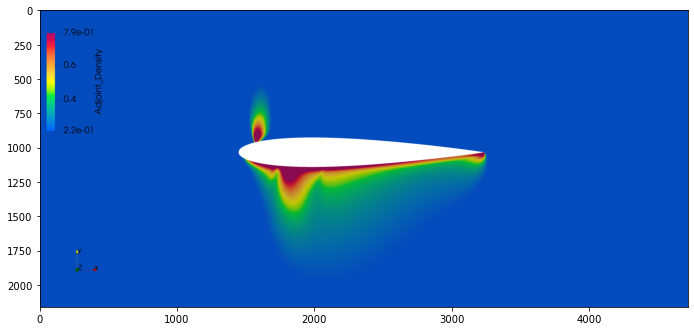

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig=plt.figure()
ax1=fig.add_subplot(2,1,2)
ax1.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Adjoint_Density.png'))

The above figure might be regarded as a sensitivity map, altough the two are conceptually different. First of all, the sensitivity map displays the gradient of the cost function with respect to the normal deformation (displacement) of the surface through the control points. The same tells, for each and every control points, how the objective function changes (the gradient, indeed) if the surfaces were to undergo an infinitesimally small normal displacement of the surface node. According to the objective function, it turns out that the gradient is adamantly sensitive to a change in geometry on the pressure side. The latter observation is very important for the sensitivity analysis, as the adjoint optimisation might be run again by only keeping the control points on the pressure side and some on the suction side near the leading edge. The immediate consequence of permorming such operation would be saving computation cost which is clearly associated to the dimension of the problem.

As the goal was to null the wave drag contribution, it is also remarkable to plot the density gradient contour and compare it with the initial design:

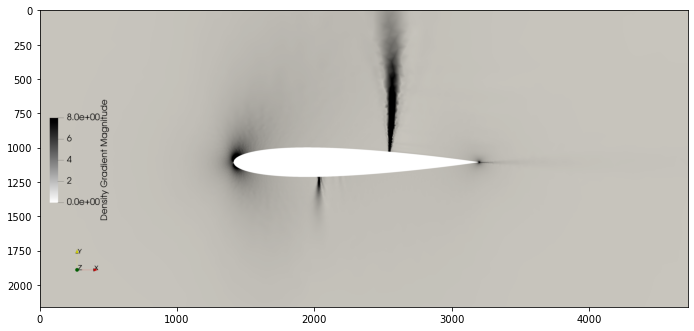

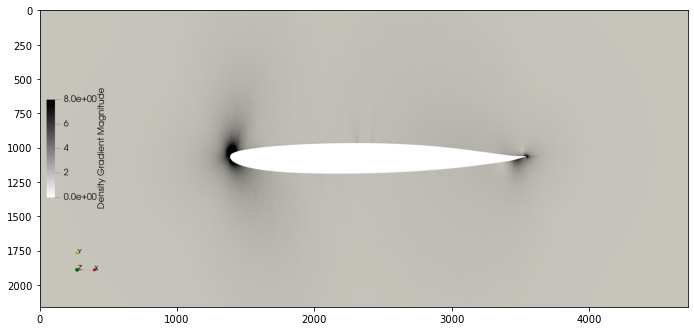

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Density_Gradient_initialdesign.png'))

fig=plt.figure()
ax2=fig.add_subplot(2,1,2)
ax2.imshow(mpimg.imread('C:/Users/Asus/Documents/SU2/Images/Density_Gradient_finaldesign.png'))

As it is possible to observe, the shock disappears from the suction side. 

Starting from the *surface_flow.vtu*, and depending on the outputs choosen by the user, it is possible to plot anything desired directly from ParaView. The same file is available in .csv format so that it might be treated onto some other different informatic language. Indeed, it is very simple to implement the code on Matlab, for instance (the code, *surface_flow_plot.m*, can be found in *Script*).

# Bibliography 

In [6]:
f=open('C:/Users/Asus/Documents/SU2/Adjoint/Inviscid_2D_Unconstrained_NACA0012/TXT_FILES/Bibliography.txt', 'r')
cfg_file=f.read()
print(cfg_file)
f.close()

[1] SU2's cite: https://su2code.github.io/tutorials/Inviscid_2D_Unconstrained_NACA0012/

[2] Giles, Mike & Pierce, Niles. (2000). On the Properties of Solutions of the Adjoint Euler Equations.

[3] Schioppa, Aldo. "Aerodynamic shape optimisation: Adjoint Method introduction", August 2022, Summer internship, ISAE-SUPAERO, Jupyter Notebook.

[4] SU2's cite: https://su2code.github.io/docs_v7/Convective-Schemes/


